# Clustering Analysis (no PCA)

In [1]:
#Set Up
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#import data
city = pd.read_csv("joined_data_for_no_PCA.csv")
city.head()

,GEOID,statename,place,type,restrict_sf_permit,restrict_mf_permit,limit_sf_units,limit_mf_units,limit_mf_dwellings,limit_mf_dwelling_units,min_lot_size,open_space,inclusionary,half_acre_less,half_acre_more,one_acre_more,two_acre_more,max_den_cat1,max_den_cat2,max_den_cat3,max_den_cat4,max_den_cat5,council_nz,planning_nz,countybrd_nz,pubhlth_nz,site_plan_nz,env_rev_nz,council_rz,planning_rz,zoning_rz,countybrd_rz,countyzone_rz,townmeet_rz,env_rev_rz,total_nz,total_rz,adu,height_ft_median,height_ft_mode,height_st_median,height_st_mode,parking_median,parking_mode,mf_per,maxden5,maxden4,maxden3,maxden2,maxden1,sindex1,sindex2,sindex3,sindex4,sindex5,sindex6,sindex7,sindex8,height_st_median_sc,height_st_mode_sc,sindex9,sindex10,sindex11,sindex9_st,sindex10_st,zri,Geography,Geographic Area Name_x,Owner-occupied housing units with a mortgage,Mortgage Value Median (dollars),Only Second mortgage,Only Home equity loan,Both second mortgage and home equity loan,No second mortgage and no home equity loan,Home equity loan without a primary mortgage,"HOUSEHOLD INCOME Less than $10,000","HOUSEHOLD INCOME $10,000 to $24,999","HOUSEHOLD INCOME $25,000 to $34,999","HOUSEHOLD INCOME $35,000 to $49,999","HOUSEHOLD INCOME $50,000 to $74,999","HOUSEHOLD INCOME $75,000 to $99,999","HOUSEHOLD INCOME $100,000 to $149,999","HOUSEHOLD INCOME $150,000 or more",Median household income (dollars),Median Monthly Household Costs (dollars),Median Real Estate Taxes (dollars),Median Gross Rent Total,Median Gross Rent Total No bedroom,Median Gross Rent Total 1 bedroom,Median Gross Rent Total 2 bedroom,Median Gross Rent Total 3 bedroom,City Name,city,county_name,lat,lng,population,density
0,102956,AL,Athens,City,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0,0,1,1,0,0,0,0,0,2,2,1,12.0,10.0,2.0,2.0,2.00,2.0,0.285714,0,1,0,0,0,0,0,1,2,2,2,0,1,28.0,28.0,12.0,2.00,0.285714,-1.775183,0.164806,0.804929,1600000US0102956,"Athens city, Alabama",3616,224100.0,80,610,0,2881,45,118,206,119,144,501,740,743,1045,98649.0,1354,755,766.0,516.0,628.0,793.0,915.0,Athens,Athens,Limestone,34.7843,-86.9503,26179.0,248.9
1,103076,AL,Auburn,City,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0,1,1,0,0,0,0,0,2,2,1,35.0,45.0,2.0,2.0,2.00,2.0,0.058824,0,0,1,0,0,0,1,4,2,2,3,0,1,28.0,28.0,35.0,2.00,0.058824,0.049086,0.164806,2.152012,1600000US0103076,"Auburn city, Alabama",9812,336900.0,171,809,0,8768,64,350,297,343,374,1119,1204,2718,3407,121522.0,1738,1487,995.0,778.0,885.0,1044.0,1171.0,Auburn,Auburn,Lee,32.6087,-85.4903,105386.0,476.6
2,105980,AL,Bessemer,City,0,0,0,0,0,0,1,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,0,1,1,1,0,0,0,0,3,3,0,35.0,35.0,NaN,NaN,4.25,1.0,0.285714,1,0,0,0,0,0,1,1,3,3,1,0,0,NaN,NaN,35.0,4.25,0.285714,0.049086,2.521087,2.217050,1600000US0105980,"Bessemer city, Alabama",3086,148700.0,79,149,0,2821,37,114,494,404,429,476,362,606,201,59930.0,1232,878,879.0,NaN,545.0,931.0,1093.0,Bessemer,Bessemer,Jefferson,33.3712,-86.9728,25890.0,247.7
3,107000,AL,Birmingham,City,0,0,0,0,0,0,1,1,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0,1,1,0,0,1,0,1,1,1,0,0,0,0,3,3,0,45.0,45.0,3.0,3.0,3.00,1.0,0.428571,0,1,0,0,0,0,1,1,3,3,2,0,0,42.0,42.0,45.0,3.00,0.428571,0.842247,1.212042,1.871958,1600000US0107000,"Birmingham city, Alabama",21329,156000.0,367,1274,48,19222,418,847,2472,1731,2229,3828,3111,3391,3720,71802.0,1252,976,995.0,814.0,926.0,970.0,1143.0,Birmingham,Birmingham,Jefferson,33.5279,-86.7971,782111.0,526.4
4,114392,AL,Chickasaw,City,0,0,0,0,0,0,1,1,0,1,0,0,0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,0,0,1,1,1,0,0,0,0,2,3,0,35.0,35.0,3.0,3.0,1.50,2.0,0.666667,1,0,0,0,0,0,1,1,2,3,1,0,0,42.0,42.0,35.0,1.50,0.666667,0.049086,-0.358812,1.821209,1600000US0114392,"Chickasaw city, Alabama",643,95100.0,14,45,0,581,3,38,33,87,100,87,152,124,22,67054.0,1087,373,871.0,559.0,619.0,829.0,1005.0,Chickasaw,Chickasaw,Mobile,30.7715,-88.0793,6398.0,587.2


In [5]:
#include data only from cities
city_only = city[city['type'] == 'City']

In [7]:
#Choose columns to keep for analysis
cols_to_keep = ["statename",
"total_nz",
"total_rz",
"adu",
"height_ft_median",
"height_ft_mode",
"parking_median",
"parking_mode",
"mf_per",
"sindex1",
"sindex2",
"sindex3",
"sindex6",
"sindex7",
"sindex9",
"zri",
'Owner-occupied housing units with a mortgage',
'Mortgage Value Median (dollars)', 'Only Second mortgage',
'Only Home equity loan', 'Both second mortgage and home equity loan',
'No second mortgage and no home equity loan',
'Home equity loan without a primary mortgage',
#'HOUSEHOLD INCOME Less than $10,000',
#'HOUSEHOLD INCOME $10,000 to $24,999',
#HOUSEHOLD INCOME $25,000 to $34,999',
#'HOUSEHOLD INCOME $35,000 to $49,999',
#'HOUSEHOLD INCOME $50,000 to $74,999',
#'HOUSEHOLD INCOME $75,000 to $99,999',
#'HOUSEHOLD INCOME $100,000 to $149,999',
#'HOUSEHOLD INCOME $150,000 or more',
'Median household income (dollars)',
'Median Monthly Household Costs (dollars)',
'Median Real Estate Taxes (dollars)',
'Median Gross Rent Total',	
'Median Gross Rent Total 1 bedroom',	
'Median Gross Rent Total 2 bedroom',	
'Median Gross Rent Total 3 bedroom',
'city',	
'lat',	
'lng',	
'population',	
'density']

In [9]:
#Keep only specified columns for analysis 
city_small = city_only[cols_to_keep]

In [11]:
#drop cities with missing values 
city_small_clean = city_small.dropna()
#print final count of cities
len(city_small_clean)

1494

In [13]:
#remove identifying columns 
city_final = city_small_clean.drop(columns = ['statename', 'lat', 'lng', 'zri', 'city'])
city_final.head()

,total_nz,total_rz,adu,height_ft_median,height_ft_mode,parking_median,parking_mode,mf_per,sindex1,sindex2,sindex3,sindex6,sindex7,sindex9,Owner-occupied housing units with a mortgage,Mortgage Value Median (dollars),Only Second mortgage,Only Home equity loan,Both second mortgage and home equity loan,No second mortgage and no home equity loan,Home equity loan without a primary mortgage,Median household income (dollars),Median Monthly Household Costs (dollars),Median Real Estate Taxes (dollars),Median Gross Rent Total,Median Gross Rent Total 1 bedroom,Median Gross Rent Total 2 bedroom,Median Gross Rent Total 3 bedroom,population,density
0,2,2,1,12.0,10.0,2.00,2.0,0.285714,0,0,1,2,0,12.0,3616,224100.0,80,610,0,2881,45,98649.0,1354,755,766.0,628.0,793.0,915.0,26179.0,248.9
1,2,2,1,35.0,45.0,2.00,2.0,0.058824,0,1,4,3,0,35.0,9812,336900.0,171,809,0,8768,64,121522.0,1738,1487,995.0,885.0,1044.0,1171.0,105386.0,476.6
2,3,3,0,35.0,35.0,4.25,1.0,0.285714,0,1,1,1,0,35.0,3086,148700.0,79,149,0,2821,37,59930.0,1232,878,879.0,545.0,931.0,1093.0,25890.0,247.7
3,3,3,0,45.0,45.0,3.00,1.0,0.428571,0,1,1,2,0,45.0,21329,156000.0,367,1274,48,19222,418,71802.0,1252,976,995.0,926.0,970.0,1143.0,782111.0,526.4
4,2,3,0,35.0,35.0,1.50,2.0,0.666667,0,1,1,1,0,35.0,643,95100.0,14,45,0,581,3,67054.0,1087,373,871.0,619.0,829.0,1005.0,6398.0,587.2


### Standardize Data

In [15]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(city_final)

# Clustering 

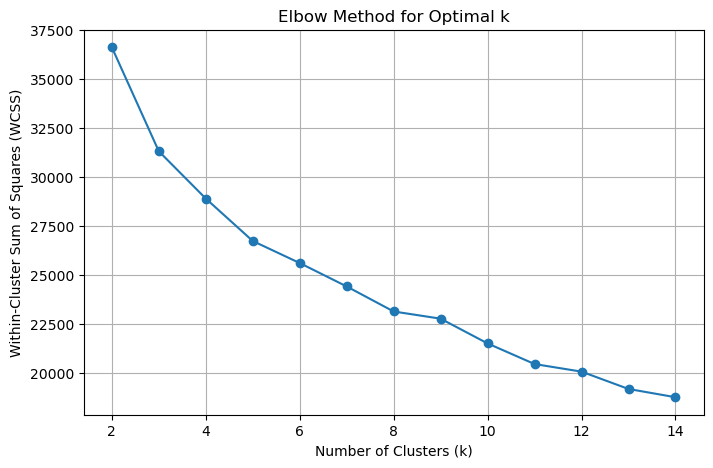

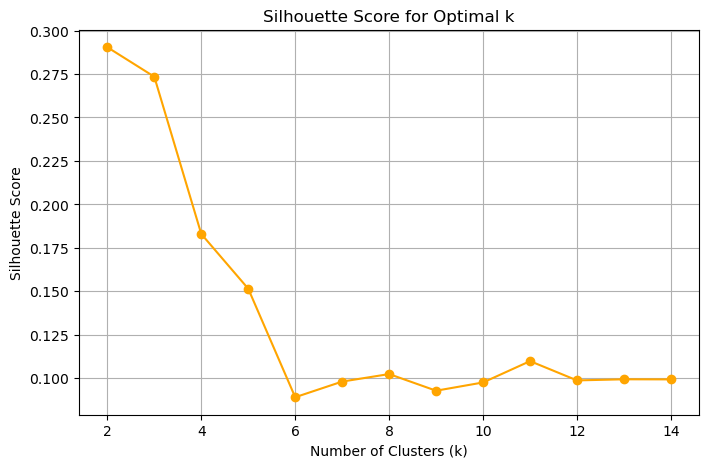

In [19]:
# Step 2: Use the Elbow Method and Silhouette Score to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares (Elbow method)
silhouette_scores = []

# Test a range of cluster values
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid()
plt.show()

In [35]:
# Step 3: Choose optimal k based on the Elbow and Silhouette Score (typically where the WCSS flattens or silhouette score is highest)
# For example, let's assume optimal_k is 4 based on the above plots
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init = 10)
kmeans.fit(X_scaled)

# Step 4: Add the cluster labels to your PCA results
city_small_clean['Cluster'] = kmeans.labels_

print(f"Optimal number of clusters: {optimal_k}")
print("Cluster labels added to the data:")
city_small_clean.head()

Optimal number of clusters: 8
Cluster labels added to the data:


/var/folders/sz/jf5zxmhx21xf04cmtkl7ls5r0000gn/T/ipykernel_24743/1961182551.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,statename,total_nz,total_rz,adu,height_ft_median,height_ft_mode,parking_median,parking_mode,mf_per,sindex1,sindex2,sindex3,sindex6,sindex7,sindex9,zri,Owner-occupied housing units with a mortgage,Mortgage Value Median (dollars),Only Second mortgage,Only Home equity loan,Both second mortgage and home equity loan,No second mortgage and no home equity loan,Home equity loan without a primary mortgage,Median household income (dollars),Median Monthly Household Costs (dollars),Median Real Estate Taxes (dollars),Median Gross Rent Total,Median Gross Rent Total 1 bedroom,Median Gross Rent Total 2 bedroom,Median Gross Rent Total 3 bedroom,city,lat,lng,population,density,Cluster
0,AL,2,2,1,12.0,10.0,2.00,2.0,0.285714,0,0,1,2,0,12.0,0.804929,3616,224100.0,80,610,0,2881,45,98649.0,1354,755,766.0,628.0,793.0,915.0,Athens,34.7843,-86.9503,26179.0,248.9,7
1,AL,2,2,1,35.0,45.0,2.00,2.0,0.058824,0,1,4,3,0,35.0,2.152012,9812,336900.0,171,809,0,8768,64,121522.0,1738,1487,995.0,885.0,1044.0,1171.0,Auburn,32.6087,-85.4903,105386.0,476.6,7
2,AL,3,3,0,35.0,35.0,4.25,1.0,0.285714,0,1,1,1,0,35.0,2.217050,3086,148700.0,79,149,0,2821,37,59930.0,1232,878,879.0,545.0,931.0,1093.0,Bessemer,33.3712,-86.9728,25890.0,247.7,3
3,AL,3,3,0,45.0,45.0,3.00,1.0,0.428571,0,1,1,2,0,45.0,1.871958,21329,156000.0,367,1274,48,19222,418,71802.0,1252,976,995.0,926.0,970.0,1143.0,Birmingham,33.5279,-86.7971,782111.0,526.4,3
4,AL,2,3,0,35.0,35.0,1.50,2.0,0.666667,0,1,1,1,0,35.0,1.821209,643,95100.0,14,45,0,581,3,67054.0,1087,373,871.0,619.0,829.0,1005.0,Chickasaw,30.7715,-88.0793,6398.0,587.2,3


In [37]:
feature_names = city_final.columns

# Get cluster assignments
labels = kmeans.labels_

# For each cluster
for cluster in range(kmeans.n_clusters):
    # Get the mean feature values for this cluster
    cluster_features = np.mean(X_scaled[labels == cluster], axis=0)
    
    # Convert to absolute values manually
    abs_features = [abs(x) for x in cluster_features]
    
    # Find the feature with highest absolute mean value
    most_important_idx = abs_features.index(max(abs_features))
    most_important = feature_names[most_important_idx]
    
    print(f"\nCluster {cluster}:")
    print(f"Most important feature: {most_important}")
    print(f"Mean value: {cluster_features[most_important_idx]:.3f}")
    
    # Get top 10 features
    sorted_indices = sorted(range(len(abs_features)), 
                          key=lambda k: abs_features[k], 
                          reverse=True)[:10]
    
    print("Top 10 distinctive features:")
    for idx in sorted_indices:
        print(f"{feature_names[idx]}: {cluster_features[idx]:.3f}")


Cluster 0:
Most important feature: parking_mode
Mean value: 4.119
Top 10 distinctive features:
parking_mode: 4.119
parking_median: 3.597
Median Monthly Household Costs (dollars): -0.491
Median Gross Rent Total: -0.484
Median household income (dollars): -0.448
Median Gross Rent Total 2 bedroom: -0.438
Median Gross Rent Total 3 bedroom: -0.437
Mortgage Value Median (dollars): -0.435
Median Gross Rent Total 1 bedroom: -0.424
Median Real Estate Taxes (dollars): -0.361

Cluster 1:
Most important feature: Mortgage Value Median (dollars)
Mean value: 2.860
Top 10 distinctive features:
Mortgage Value Median (dollars): 2.860
Median Monthly Household Costs (dollars): 2.673
Median Gross Rent Total 3 bedroom: 2.662
Median Gross Rent Total 2 bedroom: 2.602
Median Gross Rent Total: 2.547
Median household income (dollars): 2.496
Median Gross Rent Total 1 bedroom: 2.342
Median Real Estate Taxes (dollars): 2.215
sindex7: 1.268
density: 0.778

Cluster 2:
Most important feature: Only Second mortgage
Mean

In [39]:
# Get cluster assignments
labels = kmeans.labels_

# Create empty lists to store results
cluster_nums = []
feature_names_list = []
feature_values = []

# For each cluster
for cluster in range(kmeans.n_clusters):
    # Get the mean feature values for this cluster
    cluster_features = np.mean(X_scaled[labels == cluster], axis=0)
    
    # Convert to absolute values manually
    abs_features = [abs(x) for x in cluster_features]
    
    # Get top 10 features
    sorted_indices = sorted(range(len(abs_features)), 
                          key=lambda k: abs_features[k], 
                          reverse=True)[:10]
    
    # Store results
    for idx in sorted_indices:
        cluster_nums.append(cluster)
        feature_names_list.append(feature_names[idx])
        feature_values.append(cluster_features[idx])

# Create DataFrame
results_df = pd.DataFrame({
    'Cluster': cluster_nums,
    'Feature': feature_names_list,
    'Importance': feature_values
})

# Round importance values to 3 decimal places
results_df['Importance'] = results_df['Importance'].round(3)

# Display the results
results_df

,Cluster,Feature,Importance
0,0,parking_mode,4.119
1,0,parking_median,3.597
2,0,Median Monthly Household Costs (dollars),-0.491
3,0,Median Gross Rent Total,-0.484
4,0,Median household income (dollars),-0.448
...,...,...,...
75,7,Median Monthly Household Costs (dollars),-0.453
76,7,sindex6,0.451
77,7,Median Gross Rent Total 3 bedroom,-0.446
78,7,Median household income (dollars),-0.405


In [41]:
import plotly.express as px

In [43]:
clusters = city_small_clean[['statename', 'city', 'lat', 'lng', 'Cluster', 'zri', 'sindex1']]
clusters['Cluster'] = "Cluster " + clusters['Cluster'].astype(str)
clusters.head()

/var/folders/sz/jf5zxmhx21xf04cmtkl7ls5r0000gn/T/ipykernel_24743/3421379721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,statename,city,lat,lng,Cluster,zri,sindex1
0,AL,Athens,34.7843,-86.9503,Cluster 7,0.804929,0
1,AL,Auburn,32.6087,-85.4903,Cluster 7,2.152012,0
2,AL,Bessemer,33.3712,-86.9728,Cluster 3,2.217050,0
3,AL,Birmingham,33.5279,-86.7971,Cluster 3,1.871958,0
4,AL,Chickasaw,30.7715,-88.0793,Cluster 3,1.821209,0


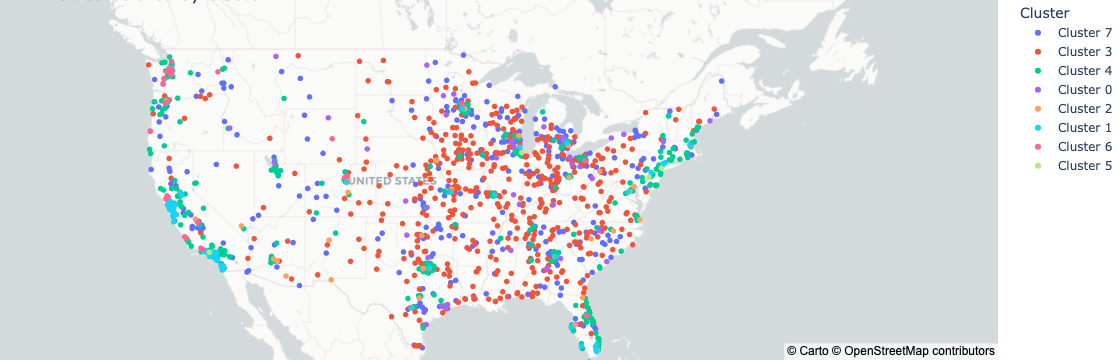

In [45]:
# Create the scatter map
fig = px.scatter_mapbox(
    clusters,
    lat="lat",
    lon="lng",
    color="Cluster",  # Colors by cluster number
    hover_name="city",  # Display city name on hover
    hover_data={"statename": True, "lat": False, "lng": False, "Cluster": True, "zri": True},
    title="Cities Colored by Cluster",
    zoom=6,
    color_discrete_sequence=px.colors.qualitative.Plotly  # Discrete color scale for clusters
)

# Update the layout for mapbox style
fig.update_layout(mapbox_style="carto-positron")  # Other options: "open-street-map", "stamen-terrain", etc.
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})  # Optional: remove extra margins

fig.show()

#### Look at average Zoning Restrictiveness Across Clusters

In [49]:
clusters.groupby(['Cluster']).mean('zri')[['zri']]

,zri
Cluster,
Cluster 0,1.772637
Cluster 1,2.567496
Cluster 2,3.080023
Cluster 3,1.552238
Cluster 4,2.472144
Cluster 5,2.444174
Cluster 6,4.013415
Cluster 7,1.891218


#### Look at averages of features across clusters 

In [51]:
city_small_clean.groupby('Cluster').mean('zri')

,total_nz,total_rz,adu,height_ft_median,height_ft_mode,parking_median,parking_mode,mf_per,sindex1,sindex2,sindex3,sindex6,sindex7,sindex9,zri,Owner-occupied housing units with a mortgage,Mortgage Value Median (dollars),Only Second mortgage,Only Home equity loan,Both second mortgage and home equity loan,No second mortgage and no home equity loan,Home equity loan without a primary mortgage,Median household income (dollars),Median Monthly Household Costs (dollars),Median Real Estate Taxes (dollars),Median Gross Rent Total,Median Gross Rent Total 1 bedroom,Median Gross Rent Total 2 bedroom,Median Gross Rent Total 3 bedroom,lat,lng,population,density
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.022727,2.568182,0.340909,31.727273,31.250000,4.906591,5.989773,0.371312,0.000000,0.704545,2.000000,1.886364,0.159091,32.380682,1.772637,4452.681818,2.010386e+05,72.659091,355.795455,15.045455,3912.204545,96.977273,89613.386364,1411.613636,2518.431818,982.159091,768.000000,1002.136364,1240.909091,39.549225,-90.757307,6.031966e+04,904.440909
1,2.277778,2.277778,0.833333,32.561111,32.622222,1.639222,1.334444,0.484812,0.044444,0.855556,2.233333,1.255556,0.877778,32.561111,2.567496,7555.877778,1.076231e+06,162.944444,903.411111,35.822222,6363.988889,89.711111,193127.866667,3522.466667,8018.822222,2348.411111,1916.400000,2431.122222,3109.677778,36.505493,-110.175314,5.190402e+04,1860.460000
2,2.526316,2.631579,0.842105,39.118421,40.421053,1.579474,1.123684,0.561642,0.157895,0.894737,2.868421,1.131579,0.921053,39.118421,3.080023,93889.184211,4.201684e+05,1840.421053,7338.026316,320.736842,83251.552632,1138.447368,119148.131579,2056.657895,3804.184211,1430.078947,1251.657895,1492.026316,1752.368421,36.591718,-97.803487,2.226721e+06,1940.539474
3,1.883858,2.677165,0.214567,40.687500,44.413386,1.759419,1.504035,0.377717,0.003937,0.450787,1.848425,1.728346,0.059055,40.801673,1.552238,3591.921260,1.746150e+05,67.287402,250.003937,9.915354,3201.072835,63.641732,85695.637795,1301.435039,2054.482283,900.515748,681.602362,905.838583,1120.059055,38.425672,-90.696637,4.136679e+04,655.826181
4,2.300971,2.640777,0.679612,34.144417,36.121359,1.745813,1.351578,0.452314,0.029126,0.808252,2.422330,1.368932,0.524272,34.144417,2.472144,9561.616505,3.992932e+05,195.084951,771.873786,31.830097,8429.769417,133.058252,121627.356796,2116.206311,4434.492718,1486.228155,1200.342233,1487.145631,1838.987864,38.000553,-96.631306,9.290906e+04,1455.332767
5,2.500000,2.500000,0.750000,40.000000,53.250000,1.562500,1.250000,0.598810,0.250000,0.750000,1.250000,1.000000,1.000000,40.000000,2.444174,379132.500000,5.359250e+05,7173.250000,30010.500000,1660.000000,334741.000000,5547.750000,121470.250000,2535.250000,4807.500000,1517.250000,1399.750000,1604.000000,1785.250000,39.163400,-88.788050,1.125307e+07,5864.475000
6,2.357143,2.142857,1.000000,33.089286,36.500000,1.611071,1.160714,0.437480,5.607143,0.857143,2.785714,1.357143,0.785714,33.089286,4.013415,5078.071429,5.931036e+05,112.714286,474.214286,24.785714,4394.500000,71.857143,132936.857143,2372.642857,4603.535714,1600.892857,1286.035714,1650.821429,1978.214286,42.354014,-116.092325,4.150111e+04,1089.957143
7,2.156757,2.754054,0.510811,25.331081,26.278378,1.674122,1.405638,0.374194,0.005405,0.767568,2.189189,2.067568,0.140541,25.331081,1.891218,4275.800000,2.140576e+05,80.508108,309.248649,11.521622,3803.035135,71.486486,91120.927027,1436.791892,2479.243243,983.659459,740.370270,971.429730,1235.264865,39.192349,-93.259789,5.368529e+04,725.138108


# Export Clustering Results and Feature Importance

In [59]:
city_small_clean.to_csv('Clustering_analysis.csv', index= False)

In [61]:
results_df.to_csv('clustering_feature_importance.csv', index = False)